# Simulation of $\exp(-\vert x\vert -\vert y\vert - a\vert y-x\vert)$

Target distribution:

$$
f(x, y)\propto \exp(-\vert x\vert -\vert y\vert - a\vert y-x\vert)\,.
$$

Gibbs: 

- $f(x\mid y)\propto \exp(-\vert x\vert - a\vert y-x\vert)$
- $f(y\mid x)\propto \exp(-\vert y\vert - a\vert y-x\vert)$

### Accept-Reject

$$
f(x\mid y)\propto \exp(-\vert x\vert - a\vert y-x\vert)\le \exp(-a\vert x - y\vert)
$$

In [1]:
using Distributions

In [23]:
a = 10
f(x, y) = exp( -abs(x) - a * abs(y-x) )
g(x, y) = exp(-a * abs(x-y))

function gibbs_ar(N::Int)
    x = ones(N+1)
    y = ones(N+1)
    for i = 2:(N+1)
        xstar = rand(Laplace(y[i-1], 1/a))
        if rand() < f(xstar, y[i-1]) / g(xstar, y[i-1])
            x[i] = xstar
        else
            x[i] = x[i-1]
        end
        
        ystar = rand(Laplace(x[i], 1/a))
        if rand() < f(x[i], ystar) / g(x[i], ystar)
            y[i] = ystar
        else
            y[i] = y[i-1]
        end
    end
    return x, y
end

gibbs_ar (generic function with 1 method)

In [24]:
x, y = gibbs_ar(1000)

([1.0, 1.0, 1.0, 1.0, 1.0, 1.07195, 0.930769, 0.713139, 0.546008, 0.666174  …  0.0213817, 0.0968143, -0.0422362, 0.0506649, 0.315365, 0.0955934, -0.13926, -0.099665, -0.611045, -0.611045], [1.0, 0.958085, 0.958085, 0.958085, 0.958085, 0.958085, 0.906274, 0.560885, 0.61187, 0.734409  …  0.140089, 0.0351813, -0.0497683, 0.116464, 0.116464, -0.0539619, -0.0539619, -0.478698, -0.549537, -0.549537])

In [25]:
using Plots

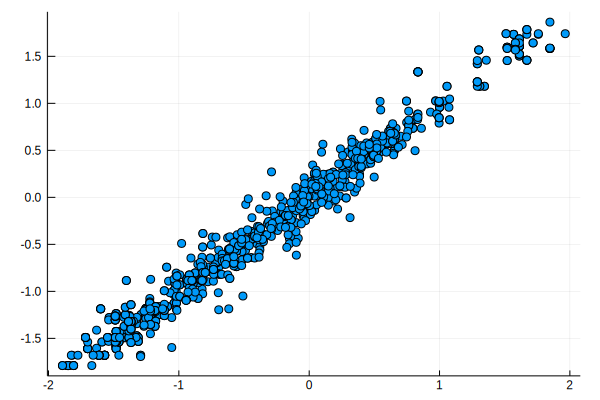

In [26]:
plot(x, y, seriestype = :scatter, legend = false)

## Inverse CDF

Refer to the [handwritten supplementary](Derivation-Exp-Abs-xy.pdf) for detailed derivation.

In [14]:
using StatsBase

In [44]:
function one_gibbs(y)
    p1 = exp(-a*y) * ( exp((a-1)*y) - 1 ) / (a - 1) * (y >= 0)
    p2 = exp(-a*y) * exp((a+1)*min(0, y))  / (a + 1)
    p3 = exp(a*y) * exp(-(1+a)*max(0, y))  / (a + 1)
    p4 = exp(a*y) * ( exp((1-a)*y) - 1) / (a - 1) * (y < 0)
    flag = sample(1:4, pweights([p1, p2, p3, p4]))
    u = rand()
    if flag == 1
        x = log( 1 + u * ( exp((a-1)*y) - 1 ) ) / (a - 1)
    elseif flag == 2
        x = log(u) / (a + 1) + min(0, y)
    elseif flag == 3
        x = -log(u) / (a + 1) + max(0, y)
    else
        x = log( 1 - u * ( 1 - exp((1-a)*y) ) ) / (1 - a)
    end
    return x
end

function gibbs_inv(N::Int)
    x = ones(N+1)
    y = ones(N+1)
    for i = 2:(N+1)
        x[i] = one_gibbs(y[i-1])
        y[i] = one_gibbs(x[i])
    end
    return x, y
end

gibbs_inv (generic function with 1 method)

In [45]:
one_gibbs(3)

3.2469523161594838

In [46]:
x, y = gibbs_inv(1000)

([1.0, 1.01954, 1.25488, 1.31049, 1.25068, 1.32997, 1.38793, 1.24884, 1.16866, 1.22989  …  0.508065, 0.397666, 0.56615, 0.735377, 0.556286, 0.502009, 0.125919, 0.233455, 0.522778, 0.312981], [1.0, 1.24181, 1.271, 1.18791, 1.27124, 1.34111, 1.19227, 1.09944, 1.1339, 1.19598  …  0.54177, 0.36308, 0.677268, 0.514871, 0.640218, 0.316574, 0.256377, 0.382262, 0.270825, 0.0834128])

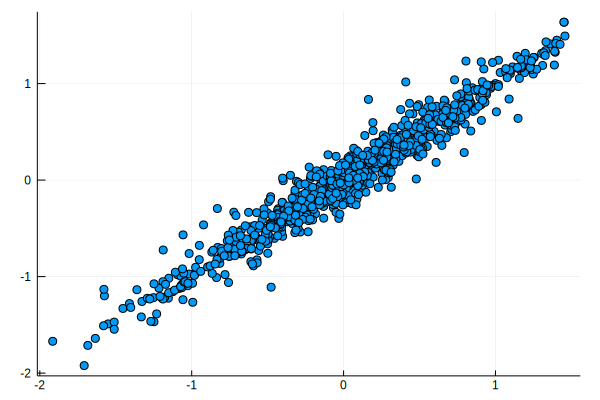

In [47]:
plot(x, y, seriestype = :scatter, legend = false)